In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1.Load the data file using pandas.

In [29]:
df = pd.read_csv("/content/googleplaystore.csv")


In [30]:
df.shape

(10841, 13)

In [31]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## 2.Check for null values in the data. Get the number of null values for each column.


In [32]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#3.Drop records with nulls in any of the columns.

In [33]:
df1 = df.dropna()
#the data that has null values in the columns get removed

In [34]:
df1.shape
#the number of elements in each dimensions

(9360, 13)

In [35]:
print(df1.isna().sum())
#it will return the total number of null values in the dataframe

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them:
  1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric:
      
        i).	Extract the numeric value from the column

        ii).	Multiply the value by 1,000, if size is mentioned in Mb


In [36]:
#4.1.i)

def convert_size(size):
  if 'Mb' in size:
        return float(size.replace('Mb', '').strip()) * 1000  # Convert Mb to Kb
  elif 'Kb' in size:
        return float(size.replace('Kb', '').strip())
  else:
        return None
df['Size(Kb)'] = df['Size'].apply(convert_size)
print(df)
print('*'*100)
numeric_sizes = df['Size(Kb)']
print(numeric_sizes)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [37]:
#4.1.ii)

df1['Size(Kb)'] = df1['Size'].apply(lambda x: float(x.replace('Mb', '').strip()) * 1000 if 'Mb' in x else float(x.replace('Kb', '').strip()) if 'Kb' in x else None)
print(df1)
print('*'*100)
numeric_sizes = df['Size(Kb)']
print(numeric_sizes)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

<ipython-input-37-e98e95f5cb1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Size(Kb)'] = df1['Size'].apply(lambda x: float(x.replace('Mb', '').strip()) * 1000 if 'Mb' in x else float(x.replace('Kb', '').strip()) if 'Kb' in x else None)


2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [38]:
#4.2

df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors='coerce').astype('Int64')
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

<ipython-input-38-b366d7b2155e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors='coerce').astype('Int64')


3.	Installs field is currently stored as string and has values like 1,000,000+.
  1.	Treat 1,000,000+ as 1,000,000
  2.	remove ‘+’, ‘,’ from the field, convert it to integer


In [39]:
df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
df1["Installs"] = pd.to_numeric(df1.Installs)
df1["Installs"].dtype

<ipython-input-39-1c686e6cb046>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-39-1c686e6cb046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-39-1c686e6cb046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

dtype('int64')

In [40]:
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

4.	Price field is a string and has $ symbol. Remove $ sign, and convert it to numeric.

In [ ]:
df1['Price'] = df1['Price'].str.replace('$', '')
df1["Price"] = pd.to_numeric(df1.Price)
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

<ipython-input-17-5502a0e70ddf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$', '')
<ipython-input-17-5502a0e70ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = df1['Price'].str.replace('$', '')
<ipython-input-17-5502a0e70ddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price"] 


**5. Sanity checks:**

  i.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.


In [ ]:
df1 = df1[(df1.Rating>=1) & (df1.Rating<=5)]
df1["Rating"]
#here the rating column should be greater than or equal 1 and less thsn 5 '&' operator is used to combine both the values

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [ ]:
df1.head(5)
#displays the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


In [ ]:
len(df1.index)
#number of datasets remaining after removing the ones having ratings not between 1 and 5

9360

ii.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [ ]:
df1.drop(df1.index[df1.Reviews>df1.Installs],axis=0,inplace=True)
#used to drop rows specified by their indices.

In [ ]:
len(df1.index)
#determine the size or length of data structures

9353

In [ ]:
#built in python module which ignores warnings
"""
import warnings
warnings.filterwarnings('ignore')
"""


"\nimport warnings\nwarnings.filterwarnings('ignore')\n"

In [ ]:
df1[(df1["Type"]=="Free") & (df1["Price"]>0)]  #since there are no such data, hence nothing is dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)


In [ ]:
len(df1.index)
 #determine the size or length of data structures

9353

#5. Performing univariate analysis:


##•	`Boxplot for Price`

•	Are there any outliers? Think about the price of usual apps on Play Store.

	Boxplot for Reviews #boxplots are used for showing the distribution of data points across a selected measure. In this case "Reviews"
•	Are there any apps with very high number of reviews? Do the values seem right?

	Histogram for Rating #histogram are used to summarize discrete or continuous data that are measured on an interval scale.In this case "Rating"
•	How are the ratings distributed? Is it more toward higher ratings?

	Histogram for Size #histogram are used to summarize discrete or continuous data that are measured on an interval scale.
Note down your observations for the plots made above. Which of these seem to have outliers?

A histogram groups the data into ranges and then plots the frequency that data occurs in each range. A box plot is used to compare multiple groups of data, and it shows the median, interquartile range, and maximum and minimum values of the data


#6. Outlier Treatment
##  1. Boxplot for Price


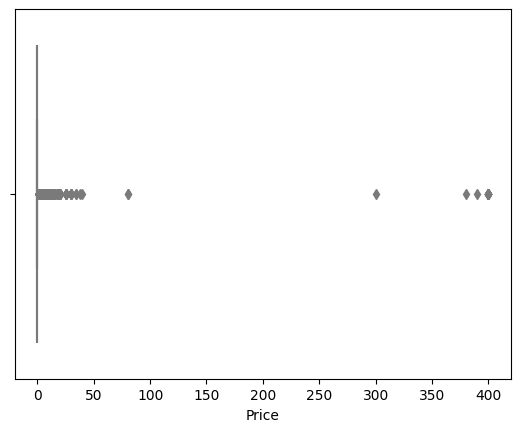

In [ ]:
sns.boxplot(x="Price",data=df1, palette = 'pastel')
sns.set_style(rc = {'axes.facecolor': 'black'})

•	Are there any outliers? Think about the price of usual apps on Play Store

In [ ]:
std = np.std(df1.Price)
mean = np.mean(df1.Price)
outlier_uplimit = mean + 3*std
print(outlier_uplimit)

48.44154573100313


In [ ]:
len(df1[(df1["Price"]>outlier_uplimit)])

17

In [ ]:
df1[(df1["Price"]>outlier_uplimit)]  #list of apps with high prices

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,None
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,None
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,None
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,None
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,None
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,None
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,None
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,None
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,None
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,None


# `Boxplot for Reviews`

  2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.





In [ ]:
std2 = np.std(df1.Reviews)
mean2 = np.mean(df1.Reviews)
outlier_uplimit_2 = mean + 3*std
print(outlier_uplimit_2)

48.44154573100313


In [ ]:
len(df1[(df1["Reviews"]>outlier_uplimit_2)])

7875

In [ ]:
df1[(df1["Reviews"]>outlier_uplimit_2)].tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
10817,HTC Sense Input - FR,TOOLS,4.0,885,8.0M,100000,Free,0.0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up,None
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,5000,Free,0.0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up,None
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,None
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up,None
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,10000,Free,0.0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up,None
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,10000,Free,0.0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up,None
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,100000,Free,0.0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,None
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up,None
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,None
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,None


3.	Installs:  There seems to be some outliers in this field
too. Apps having very high number of installs should be dropped from the analysis.
  1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
  2.	Decide a threshold as cutoff for outlier and drop records having values more than that


<Axes: xlabel='Installs'>

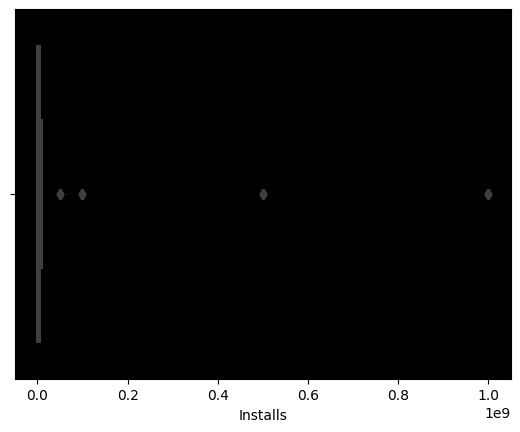

In [ ]:
sns.boxplot(x="Installs",data=df1)

In [ ]:

print(np.percentile(df1["Installs"],10))
print(np.percentile(df1["Installs"],25))
print(np.percentile(df1["Installs"],50))
print(np.percentile(df1["Installs"],70))
print(np.percentile(df1["Installs"],90))
print(np.percentile(df1["Installs"],99))

1000.0
10000.0
500000.0
5000000.0
10000000.0
500000000.0


<ipython-input-35-347eaeccab45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Installs"])


<Axes: xlabel='Installs', ylabel='Density'>

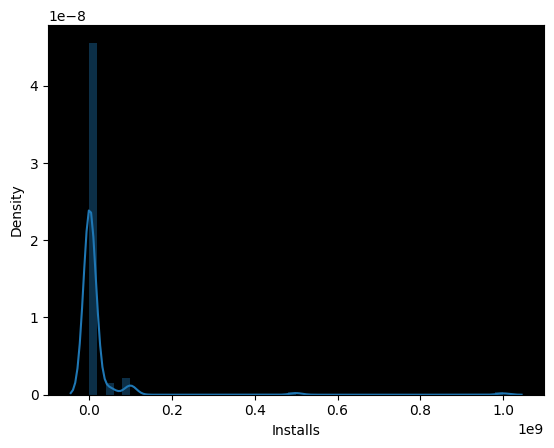

In [ ]:
sns.distplot(df1["Installs"])

In [ ]:
len(df1[df1.Installs>=100000000.0])

539

In [ ]:
df1.drop(df1.index[df1.Installs>=100000000.0],inplace=True)
len(df1.index)

8814

#7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

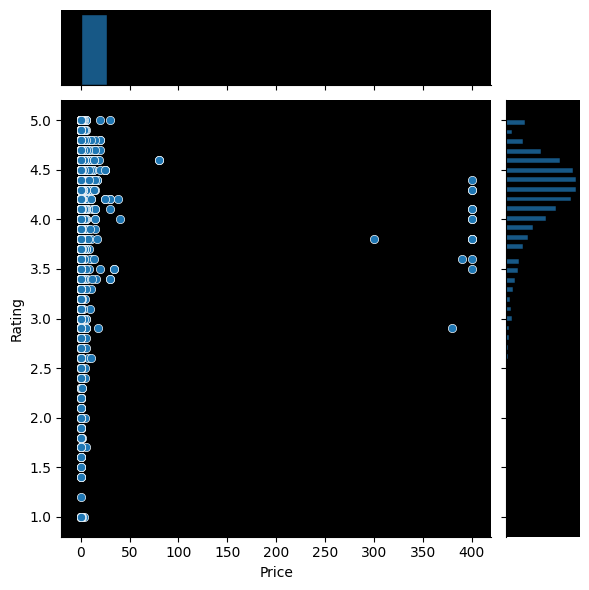

In [ ]:
# Make scatter plot/joinplot for Rating vs. Price
sns.jointplot(x="Price",y="Rating",data=df1)

In [ ]:
'''
Does rating increases with price?
----It seems like price has limited impact on rating.Make scatter plot/jointplot for Rating vs. Size
Are heavier apps rated better?
'''

'\nDoes rating increases with price?\n----It seems like price has limited impact on rating.Make scatter plot/jointplot for Rating vs. Size\nAre heavier apps rated better?\n'

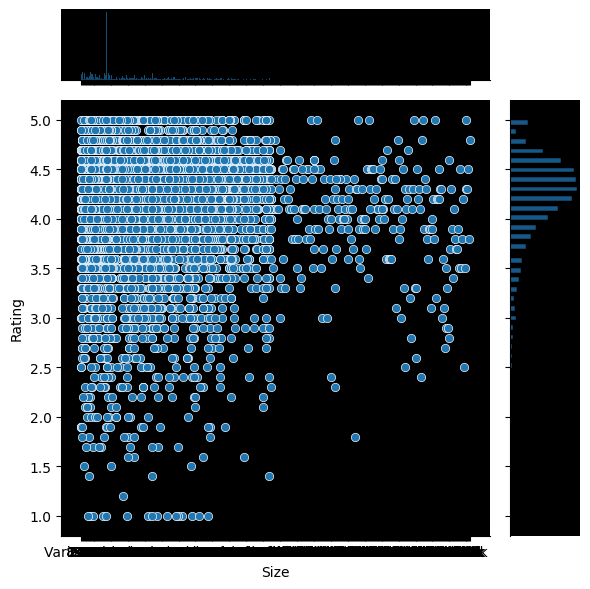

In [ ]:
# Make scatter plot/joinplot for Rating vs Size
sns.jointplot(x="Size",y="Rating",data=df1)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


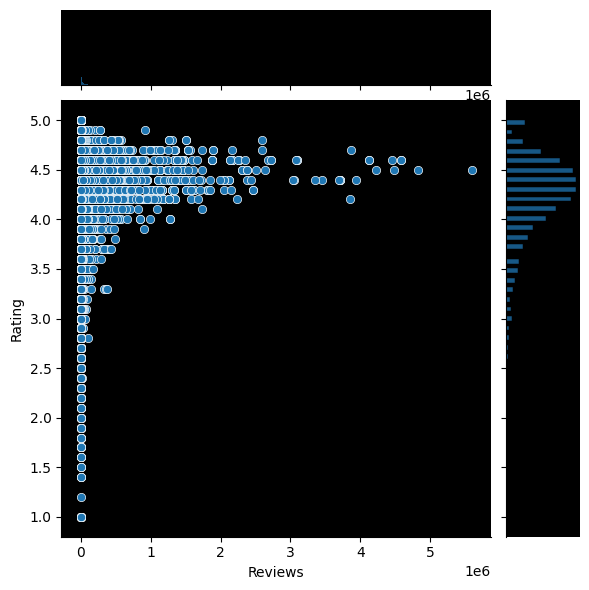

In [ ]:
# Make scatter plot/joinplot for Rating vs. Reviews
sns.jointplot(x="Reviews",y="Rating",data=df1)

In [ ]:
# Does more review mean a better rating always?
df1.corr()

<ipython-input-42-0768bacd1699>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.140847,0.104293,-0.020668
Reviews,0.140847,1.000000,0.712962,-0.019135
Installs,0.104293,0.712962,1.000000,-0.024953
Price,-0.020668,-0.019135,-0.024953,1.000000


In [ ]:
# Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?
df1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<Axes: xlabel='Rating', ylabel='Content Rating'>

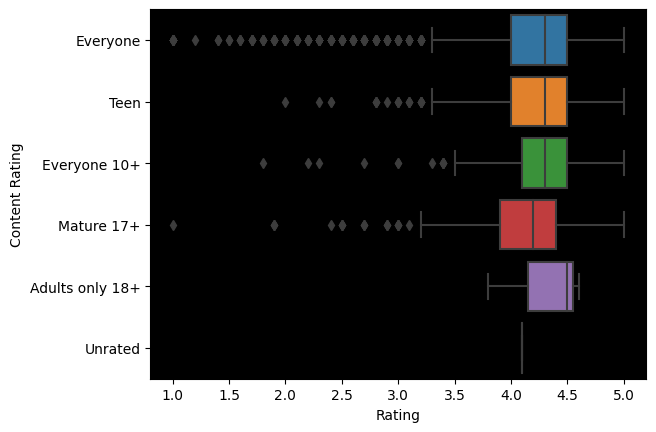

In [ ]:
sns.boxplot(x="Rating",y="Content Rating",data=df1)
#shows the distribution of quantitative data in away that shows the comparision between variables

<Axes: xlabel='Rating', ylabel='Category'>

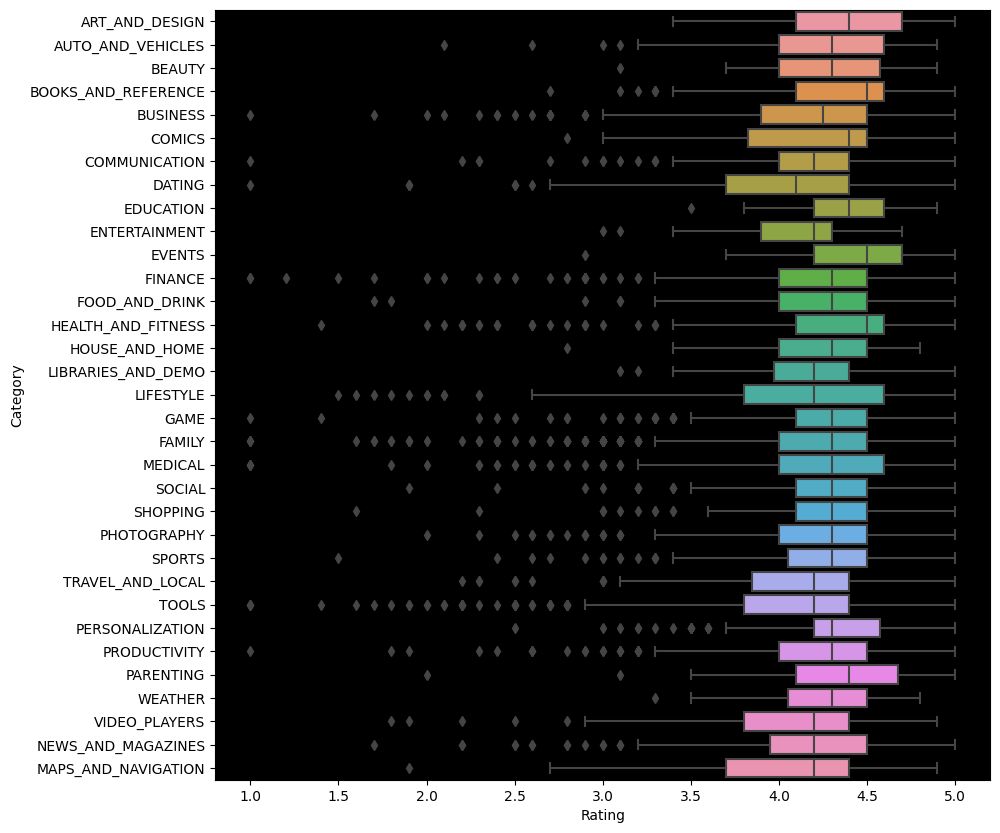

In [ ]:
plt.figure(figsize=(10,10)) #creates a new figure objects,figsize displays the width size and height size
sns.boxplot(x="Rating",y="Category",data=df1)
